In [1]:
from rasterio.plot import show
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import shape, Point, LineString, Polygon
import geopandas as gpd
import math

In [2]:
# image_path = "./multiple_roads/3/2020-03-18_2020-04-27/image.tif"
# shape_path = "./train/pac_2024_training.shp"

In [3]:
image_path = "./datasets/dataset_part_0/128_2016-12-29_2017-02-07/128_128_2016-12-29_2017-02-07.tif"
shape_path = "./datasets/dataset_part_0/128_2016-12-29_2017-02-07/128_2016-12-29_2017-02-07.shp"

In [4]:
gdf = gpd.read_file(shape_path)

In [5]:
geometry = gdf['geometry']

with rasterio.open(image_path) as src:
    bounds = src.bounds
    width, height = src.width, src.height
    x_min, y_max = bounds.left, bounds.top
    x_max, y_min = bounds.right, bounds.bottom

bbox_polygon = Polygon([(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max), (x_min, y_min)])

filtered_geometry = geometry[geometry.apply(lambda x: x.intersects(bbox_polygon))]
filtered_geometry = filtered_geometry.apply(lambda x: x.intersection(bbox_polygon))

relative_geometry = []

for geom in filtered_geometry:
    x, y = geom.xy
    print(x)
    print(y)
    x_img = (np.array(x) - x_min) / (x_max - x_min) * width
    y_img = (y_max - np.array(y)) / (y_max - y_min) * height
    print(x_img)
    print(y_img)
    relative_geometry.append((x_img, y_img))

array('d', [-75.20737453450454, -75.20819775280084])
array('d', [-10.012891828134231, -10.01867747310307])
[222.01978444 212.99381039]
[185.97065009 249.99193508]


[222.01978444 212.99381039] [185.97065009 249.99193508]


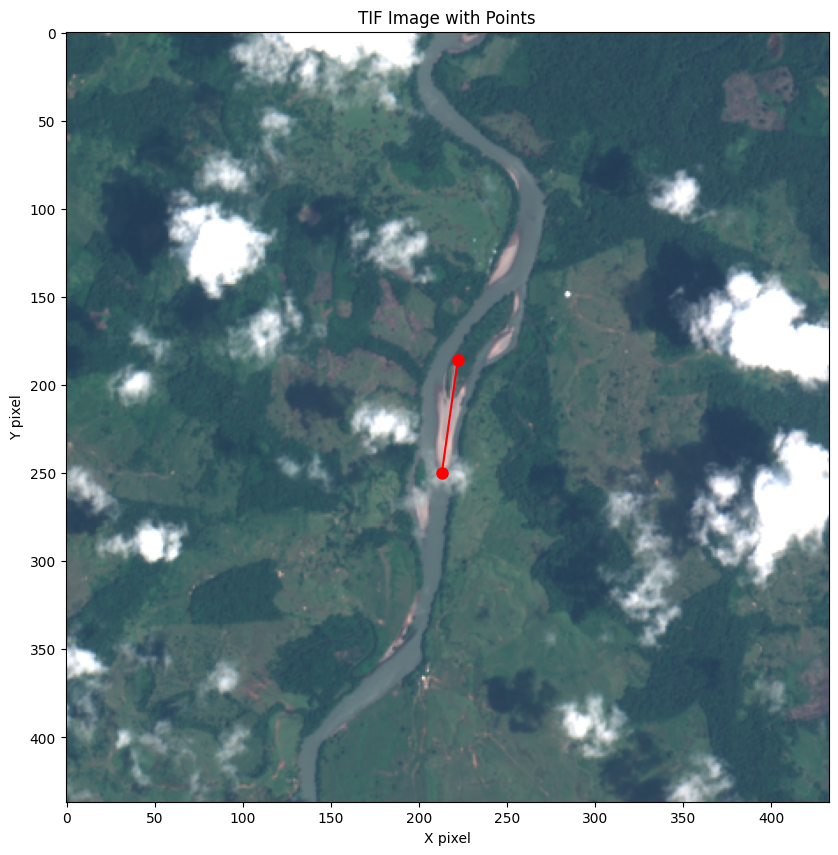

In [6]:
with rasterio.open(image_path) as src:
    image_data = src.read()
    image_data = np.transpose(image_data, (1, 2, 0))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_data, cmap=None)

# Plot the points on the image
for point in relative_geometry:
    x, y = point
    print(x, y)
    ax.plot(x, y, marker='o', color='red', markersize=8)  # Plotting points as red circles

# Set axis labels
ax.set_xlabel('X pixel')
ax.set_ylabel('Y pixel')
ax.set_title('TIF Image with Points')

# Display the plot
plt.show()

In [7]:
img_height, img_width = image_data.shape[:2]
crop_height, crop_width = (128,128)

array1 , array2 = relative_geometry[0]
x1, x2 = array1
y1, y2 = array2

x_min = min(x1, x2)
y_min = min(y1, y2)
x_max = max(x1, x2)
y_max = max(y1, y2)

x_min_valid = max(0, int(x_max - crop_width))
x_max_valid = min(int(img_width - crop_width), int(x_min))
y_min_valid = max(0, int(y_max - crop_height))
y_max_valid = min(int(img_height - crop_height), int(y_min))

if x_max_valid <= x_min_valid or y_max_valid <= y_min_valid:
    raise ValueError("Crop size is too large to contain the object.")

crop_x = random.randint(x_min_valid, x_max_valid)
crop_y = random.randint(y_min_valid, y_max_valid)

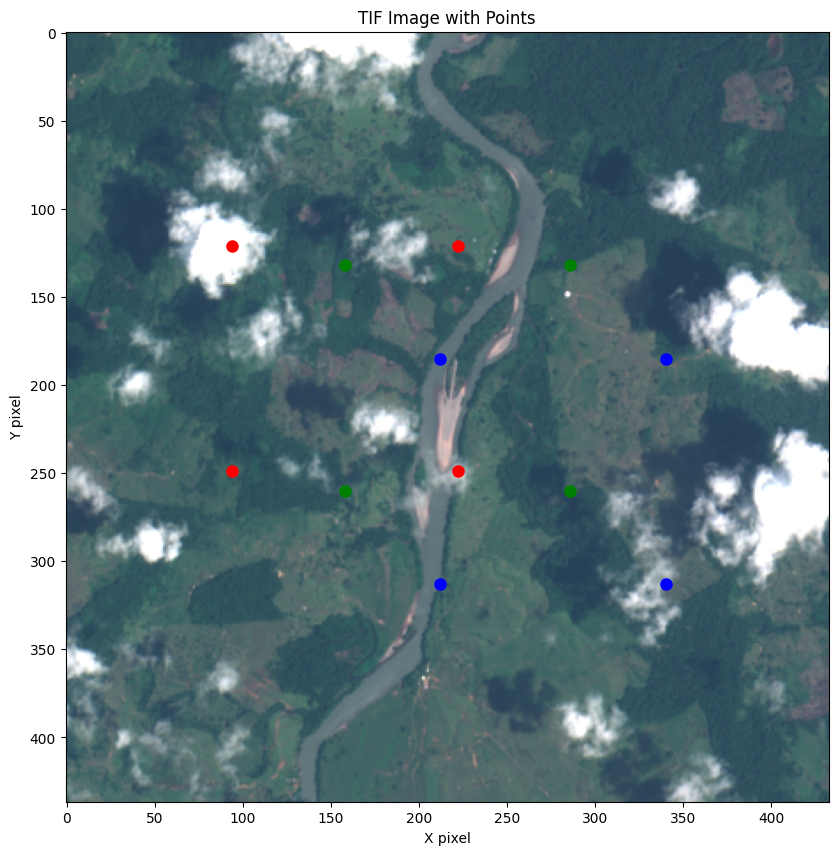

In [8]:
with rasterio.open(image_path) as src:
    image_data = src.read()
    image_data = np.transpose(image_data, (1, 2, 0))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_data, cmap=None)

ax.plot(x_min_valid, y_min_valid, marker='o', color='red', markersize=8)  # Plotting points as red circles
ax.plot(x_min_valid + crop_width, y_min_valid + crop_height, marker='o', color='red', markersize=8)  # Plotting points as red circles
ax.plot(x_min_valid, y_min_valid + crop_height, marker='o', color='red', markersize=8)  # Plotting points as red circles
ax.plot(x_min_valid + crop_width, y_min_valid, marker='o', color='red', markersize=8)  # Plotting points as red circles

ax.plot(x_max_valid, y_max_valid, marker='o', color='blue', markersize=8)  # Plotting points as red circles
ax.plot(x_max_valid + crop_width, y_max_valid + crop_height, marker='o', color='blue', markersize=8)  # Plotting points as red circles
ax.plot(x_max_valid, y_max_valid + crop_height, marker='o', color='blue', markersize=8)  # Plotting points as red circles
ax.plot(x_max_valid + crop_width, y_max_valid, marker='o', color='blue', markersize=8)  # Plotting points as red circles

ax.plot(crop_x, crop_y, marker='o', color='green', markersize=8)  # Plotting points as red circles
ax.plot(crop_x + crop_width, crop_y + crop_height, marker='o', color='green', markersize=8)  # Plotting points as red circles
ax.plot(crop_x, crop_y + crop_height, marker='o', color='green', markersize=8)  # Plotting points as red circles
ax.plot(crop_x + crop_width, crop_y, marker='o', color='green', markersize=8)  # Plotting points as red circles

# Set axis labels
ax.set_xlabel('X pixel')
ax.set_ylabel('Y pixel')
ax.set_title('TIF Image with Points')

# Display the plot
plt.show()

In [11]:
import random

def random_crop_with_object(image, line, crop_size):
    img_height, img_width = image.shape[:2]
    crop_height, crop_width = crop_size

    (array1 , array2) = line[0]
    x1, y1 = array1
    x2, y2 = array2

    x_min = min(x1, x2)
    y_min = min(y1, y2)
    x_max = max(x1, x2)
    y_max = max(y1, y2)

    x_min_valid = max(0, x_max - crop_width)
    x_max_valid = min(img_width - crop_width, x_min)
    y_min_valid = max(0, y_max - crop_height)
    y_max_valid = min(img_height - crop_height, y_min)

    if x_max_valid <= x_min_valid or y_max_valid <= y_min_valid:
        raise ValueError("Crop size is too large to contain the object.")

    crop_x = random.randint(math.ceil(x_min_valid), math.floor(x_max_valid))
    crop_y = random.randint(math.floor(y_min_valid), math.floor(y_max_valid))

    cropped_image = image[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]

    new_x1 = x1 - crop_x
    new_y1 = y1 - crop_y
    new_x2 = x2 - crop_x
    new_y2 = y2 - crop_y

    new_line = (np.array([new_x1, new_x2]), np.array([new_y1, new_y2]))

    return cropped_image, new_line

In [12]:
image, updated_points = random_crop_with_object(image_data, relative_geometry, (128, 128))
print(updated_points)

(array([94.01978444, 57.97065009]), array([16.99381039, 53.99193508]))


94.01978443983631 57.97065008673573
16.99381039417497 53.991935084267254


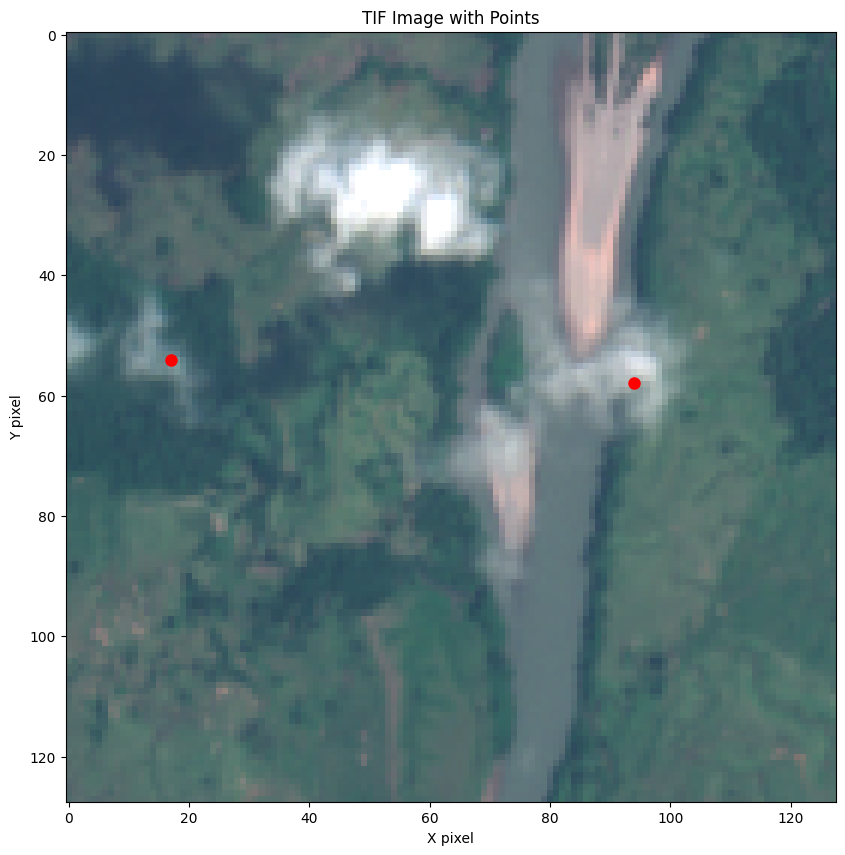

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image, cmap=None)
# Plot the points on the image
for point in updated_points:
    x, y = point
    print(x, y)
    ax.plot(x, y, marker='o', color='red', markersize=8)  # Plotting points as red circles

# Set axis labels
ax.set_xlabel('X pixel')
ax.set_ylabel('Y pixel')
ax.set_title('TIF Image with Points')

# Display the plot
plt.show()